In [1]:
import os
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

/home/warrior/miniconda3/envs/dl/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nb_dir = os.path.split(os.getcwd())[0]
sys.path.append(nb_dir)

In [3]:
%load_ext autoreload
%autoreload 2
from unet.processing.process_tensor import tensor_to_image, postprocess

In [4]:
PATH = "../local_data/prediction/tensor_image.pth"

In [5]:
y_tensor = torch.load(PATH, map_location=torch.device('cpu'))
print(y_tensor.shape)

torch.Size([1, 1, 32, 32, 32])


In [6]:
y_image = y_tensor.squeeze()
print(y_image.shape)

torch.Size([32, 32, 32])


In [7]:
y_image = y_image.permute(1, 2, 0)
print(y_image.shape)

torch.Size([32, 32, 32])


In [8]:
img = y_image.cpu().detach().numpy()
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(32, 32, 32)


In [9]:
image_index = 10

FULL TENSOR min -4.042701 max 1.1966009
SLICE min -3.7460203 max 0.52919304


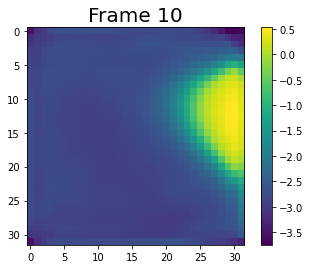

In [10]:
plt.figure()
plt.title(f'Frame {image_index}', fontsize=20)
color_map = plt.imshow(img[:,:,image_index])
plt.colorbar()

print('FULL TENSOR','min', np.min(img[:,:,:]), 'max', np.max(img[:,:,:]))
print('SLICE','min', np.min(img[:,:,image_index]), 'max', np.max(img[:,:,image_index]))

min -3.8017392 max 1.1234365
min -3.7269368 max 0.8811421
min -3.7460203 max 0.52919304


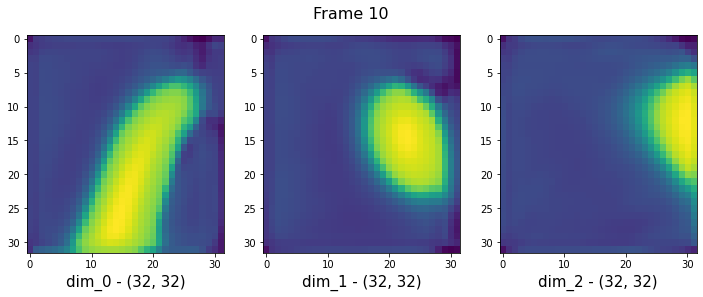

In [11]:
rows, cols = 1, 3
image_set = [img[image_index,::],img[:,image_index,:],img[:,:,image_index]]
image_name = ['dim_0','dim_1','dim_2']
fig, ax = plt.subplots(rows, cols, figsize=(12,4))
fig.suptitle('Frame {}'.format(image_index), fontsize=16)
for row in range(rows):
    for col in range(cols):
        plot_image = image_set[col]
        print('min',np.min(plot_image), 'max', np.max(plot_image))
        ax[col].imshow(plot_image, aspect='auto')
        ax[col].set_xlabel("{} - {}".format(image_name[col],plot_image.shape), fontsize=15)

## Add Background layer

In [48]:
##torch.full((2, 3), 3.141592)

In [12]:
y_tensor_2 = torch.zeros(1,1,32,32,32)
y_tensor_2.shape

torch.Size([1, 1, 32, 32, 32])

In [13]:
y_tensor_3 = torch.cat((y_tensor, y_tensor_2), 1)
y_tensor_3.shape

torch.Size([1, 2, 32, 32, 32])

In [14]:
print(y_tensor_3[0,0,image_index,:,:].min(), y_tensor_3[0,0,image_index,:,:].max())
print(y_tensor_3[0,0,:,image_index,:].min(), y_tensor_3[0,0,:,image_index,:].max())
print(y_tensor_3[0,0,:,:,image_index].min(), y_tensor_3[0,0,:,:,image_index].max())
print('')
print(y_tensor_3[0,1,image_index,:,:].min(), y_tensor_3[0,1,image_index,:,:].max())
print(y_tensor_3[0,1,:,image_index,:].min(), y_tensor_3[0,1,:,image_index,:].max())
print(y_tensor_3[0,1,:,:,image_index].min(), y_tensor_3[0,1,:,:,image_index].max())

tensor(-3.7460, grad_fn=<MinBackward1>) tensor(0.5292, grad_fn=<MaxBackward1>)
tensor(-3.8017, grad_fn=<MinBackward1>) tensor(1.1234, grad_fn=<MaxBackward1>)
tensor(-3.7269, grad_fn=<MinBackward1>) tensor(0.8811, grad_fn=<MaxBackward1>)

tensor(0., grad_fn=<MinBackward1>) tensor(0., grad_fn=<MaxBackward1>)
tensor(0., grad_fn=<MinBackward1>) tensor(0., grad_fn=<MaxBackward1>)
tensor(0., grad_fn=<MinBackward1>) tensor(0., grad_fn=<MaxBackward1>)


In [48]:
fmax = nn.Softmax(dim=1)
soft = fmax(y_tensor_3)
soft.shape

torch.Size([1, 2, 32, 32, 32])

In [49]:
print(soft[0,0,image_index,:,:].min(), soft[0,0,image_index,:,:].max())
print(soft[0,0,:,image_index,:].min(), soft[0,0,:,image_index,:].max())
print(soft[0,0,:,:,image_index].min(), soft[0,0,:,:,image_index].max())
print('')
print(soft[0,1,image_index,:,:].min(), soft[0,1,image_index,:,:].max())
print(soft[0,1,:,image_index,:].min(), soft[0,1,:,image_index,:].max())
print(soft[0,1,:,:,image_index].min(), soft[0,1,:,:,image_index].max())

tensor(0.0231, grad_fn=<MinBackward1>) tensor(0.6293, grad_fn=<MaxBackward1>)
tensor(0.0218, grad_fn=<MinBackward1>) tensor(0.7546, grad_fn=<MaxBackward1>)
tensor(0.0235, grad_fn=<MinBackward1>) tensor(0.7071, grad_fn=<MaxBackward1>)

tensor(0.3707, grad_fn=<MinBackward1>) tensor(0.9769, grad_fn=<MaxBackward1>)
tensor(0.2454, grad_fn=<MinBackward1>) tensor(0.9782, grad_fn=<MaxBackward1>)
tensor(0.2929, grad_fn=<MinBackward1>) tensor(0.9765, grad_fn=<MaxBackward1>)


## Permute DIM

In [51]:
soft = soft.permute(0, 1, 3, 4, 2)
print(soft.shape)

torch.Size([1, 2, 32, 32, 32])


In [52]:
img = soft.cpu().detach().numpy()
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(1, 2, 32, 32, 32)


(32, 32)


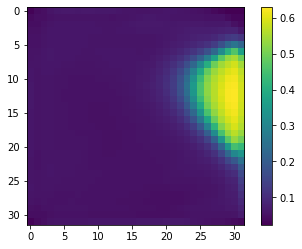

In [54]:
plt.figure()
img_flat = img[0,0,:,:,image_index]
print(img_flat.shape)
color_map = plt.imshow(img_flat)
plt.colorbar()

In [19]:
np.min(img_flat), np.max(img_flat)

(0.02350086, 0.7070588)

(32, 32)


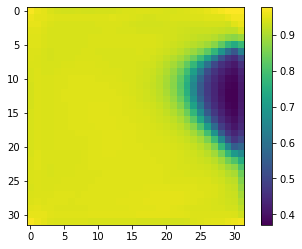

In [56]:
plt.figure()
img_flat = img[0,1,:,:,image_index]
print(img_flat.shape)
color_map = plt.imshow(img_flat)
plt.colorbar()

In [31]:
np.min(img_flat), np.max(img_flat)

(0.37070513, 0.9769331)

In [32]:
y_image = soft.squeeze()
print(y_image.shape)

torch.Size([2, 32, 32, 32])


In [33]:
y_image = y_image.permute(0, 2, 3, 1)
print(y_image.shape)

torch.Size([2, 32, 32, 32])


In [34]:
y_image = torch.argmax(y_image, dim=0)
y_image.shape

torch.Size([32, 32, 32])

In [44]:
img_bin = y_image.cpu().detach().numpy()
print(type(img_bin))
print(img_bin.shape)
img_bin = np.where(img_bin==0,1,0)
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(32, 32, 32)
<class 'numpy.ndarray'>
(1, 2, 32, 32, 32)


In [45]:
print(img_bin[image_index,:,:].min(), img_bin[image_index,:,:].max())
print(img_bin[:,image_index,:].min(), img_bin[:,image_index,:].max())
print(img_bin[:,:,image_index].min(), img_bin[:,:,image_index].max())

0 1
0 1
0 1


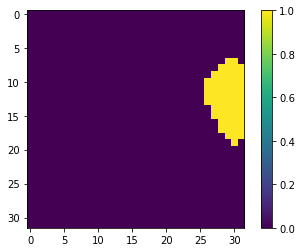

In [46]:
plt.figure()
color_map = plt.imshow(img_bin[:,:,image_index])
plt.colorbar()

In [38]:
input_  = nib.load('../local_data/test_data/hippo_001.nii.gz')
input_data = input_.get_fdata()
print(type(input_data))
print('Height, Width, N_images, Channels')
print(input_data.shape)

<class 'numpy.ndarray'>
Height, Width, N_images, Channels
(32, 32, 32)


In [39]:
train  = nib.load('../local_data/example_train/hippocampus_001.nii.gz')
train_data = train.get_fdata()
print(type(train_data))
print('Height, Width, N_images, Channels')
print(train_data.shape)

<class 'numpy.ndarray'>
Height, Width, N_images, Channels
(35, 51, 35)


In [40]:
label  = nib.load('../local_data/example_label/hippocampus_001.nii.gz')
label_data = label.get_fdata()
print(type(label_data))
print('Height, Width, N_images, Channels')
print(label_data.shape)

<class 'numpy.ndarray'>
Height, Width, N_images, Channels
(35, 51, 35)


In [41]:
image_index = 10

In [42]:
print('Input',input_data.shape)
print('Img',img.shape)
print('Img_bin',img_bin.shape)
print('Train',train_data.shape)
print('Label',label_data.shape)

Input (32, 32, 32)
Img (1, 2, 32, 32, 32)
Img_bin (32, 32, 32)
Train (35, 51, 35)
Label (35, 51, 35)


0 0
0 1
1 0
1 1
2 0
2 1


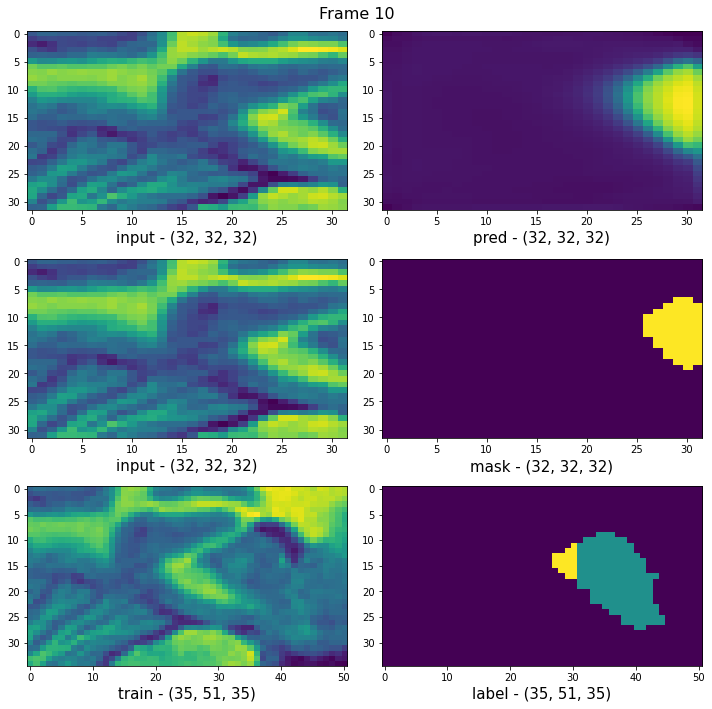

In [57]:
rows, cols = 3, 2
image_set = np.array([[input_data, img[0,0,:,:,:]],
                      [input_data, img_bin],
                      [train_data, label_data],
                      ], dtype=object)
image_name = np.array([['input','pred'],
                       ['input','mask'],
                       ['train', 'label']])
fig, ax = plt.subplots(rows, cols, figsize=(10,10))
fig.suptitle('Frame {}'.format(image_index), fontsize=16)
for row in range(rows):
    for col in range(cols):
        print(row,col)
        plot_image = image_set[row,col]
        ax[row,col].imshow(plot_image[:,:,image_index], aspect='auto')
        ax[row,col].set_xlabel("{} - {}".format(image_name[row,col],plot_image.shape), fontsize=15)
fig.tight_layout()